# 从零开始实现 线性回归

In [1]:
%matplotlib inline
import random
import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from d2l import torch as d2l

print("Hello world!")

Hello world!


features tensor([0.0849, 0.1891])
labels tensor([3.7327])


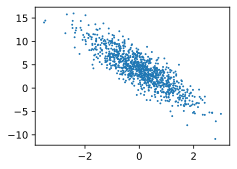

In [17]:
def synthetic_data(w, b, num_examples): #@save
    """⽣成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print("features", features[0])

print("labels", labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [16]:
# read data set
def data_iter(bath_size,features,labels):
    num_examples = len(features)
    index = list(range(num_examples))
    random.shuffle(index)
    for i in range (0,num_examples,bath_size):
        bath_index = torch.tensor(index[i:min(i+bath_size,num_examples)])
        yield features[bath_index],labels[bath_index]

bath_size = 10
for X,y in data_iter(bath_size,features,labels):
    print(X,'\n',y)
    print("--------------------------------")
    break

tensor([[ 7.4884e-01,  9.8434e-01],
        [ 4.8603e-02,  1.6298e+00],
        [-2.3014e+00, -4.2104e-01],
        [-1.5531e-01,  2.0920e-02],
        [-7.7545e-01,  7.8113e-01],
        [-4.7372e-02, -1.7376e-04],
        [ 5.4376e-02,  8.0932e-01],
        [-1.0868e+00, -2.2515e+00],
        [ 1.6002e+00,  9.0977e-02],
        [ 5.8697e-02,  1.6587e+00]]) 
 tensor([[ 2.3610e+00],
        [-1.2425e+00],
        [ 1.0355e+00],
        [ 3.8155e+00],
        [-2.5789e-03],
        [ 4.1122e+00],
        [ 1.5575e+00],
        [ 9.7001e+00],
        [ 7.0869e+00],
        [-1.3345e+00]])
--------------------------------
